# 【問題1】コンペティション内容の確認

## Home Creditはどのような企業？

## 何を学習し、何を予測するのか

### 電話会社や取引情報を含むさまざまな代替データを利用して、クライアントの返済能力を予測する。

## どのようなファイルを作りKaggleに提出するか

### SK_ID_CURRを０列目、TARGETを１列目に入力したファイル

## 提出されたものはどういった指標値で評価されるのか

### ROC曲線とx軸の間の面積

# 【問題2】学習と検証

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('home-credit-default-risk/application_train.csv')

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 307511行122列のデータセット。データ型はfloat型が65列、int型が41列、object型が16列

In [6]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### 欠損値は多いものだと７割ほど欠損している。

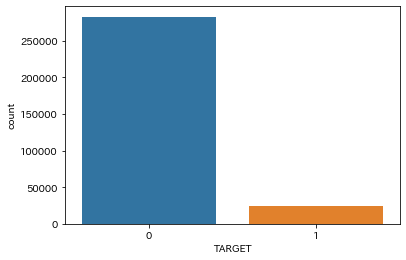

In [8]:
sns.countplot(x='TARGET', data=data)

### 目的変数に偏りが大きく、評価方法がROCのため、１に近い値の小さな違いが大きく、評価に影響する可能性がある。

In [9]:
# カテゴリー変数のカテゴリー数を調べる。
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
# 性別の欠損値を消す
data.drop(list(data[data['CODE_GENDER']=='XNA'].index), inplace=True)

In [11]:
print(data['OCCUPATION_TYPE'].unique())
print(data['ORGANIZATION_TYPE'].unique())

['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Indust

In [12]:
# 'ORGANIZATION_TYPE'の列を落とす
data.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [13]:
# カテゴリ数が2のものはlabel encodingする
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])

In [14]:
# カテゴリ数が３以上のものはone-hot encodingする
data = pd.get_dummies(data)

In [15]:
# 正の相関が最も強いDAYS_BIRTHを年齢に直す
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])/365
data.rename(columns={'DAYS_BIRTH': 'age'}, inplace=True)

In [16]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,age,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25.920548,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,

In [17]:
corr_target = data.corr()['TARGET'].sort_values()

In [18]:
# 負の相関係数上位１０個を見る
corr_target.head(10)

EXT_SOURCE_3                           -0.178926
EXT_SOURCE_2                           -0.160471
EXT_SOURCE_1                           -0.155317
age                                    -0.078242
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046211
DAYS_EMPLOYED                          -0.044934
FLOORSMAX_AVG                          -0.044009
FLOORSMAX_MEDI                         -0.043773
FLOORSMAX_MODE                         -0.043231
Name: TARGET, dtype: float64

In [19]:
# 正の相関係数上位１０個を見る
corr_target.tail(11)

REG_CITY_NOT_LIVE_CITY                               0.044394
FLAG_EMP_PHONE                                       0.045984
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049822
REG_CITY_NOT_WORK_CITY                               0.050992
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER                                          0.054710
DAYS_LAST_PHONE_CHANGE                               0.055219
NAME_INCOME_TYPE_Working                             0.057483
REGION_RATING_CLIENT                                 0.058901
REGION_RATING_CLIENT_W_CITY                          0.060895
TARGET                                               1.000000
Name: TARGET, dtype: float64

## ひとまず相関係数上位１０個で学習させてみる

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# 負の相関上位１０個と正の相関上位１０個をリスト化
negative_corr_list = data.corr()['TARGET'].sort_values()[:10]
positive_corr_list = data.corr()['TARGET'].sort_values()[-11:-1]

In [22]:
train_x = pd.concat([data[negative_corr_list.index], data[positive_corr_list.index]], axis=1)

In [23]:
train_x

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.139376,0.262949,0.083037,25.920548,0,0,-637,0.0833,0.0833,0.0833,0,1,1,0,-2120,1,-1134.0,1,2,2
1,NaN,0.622246,0.311267,45.931507,1,0,-1188,0.2917,0.2917,0.2917,0,1,0,0,-291,0,-828.0,0,1,1
2,0.729567,0.555912,NaN,52.180822,0,0,-225,NaN,NaN,NaN,0,1,1,0,-2531,1,-815.0,1,2,2
3,NaN,0.650442,NaN,52.068493,0,0,-3039,NaN,NaN,NaN,0,1,1,0,-2437,0,-617.0,1,2,2
4,NaN,0.322738,NaN,54.608219,0,0,-3038,NaN,NaN,NaN,0,1,1,1,-3458,1,-1106.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.681632,0.145570,25.553425,0,0,-236,0.6042,0.6042,0.4583,0,1,1,0,-1982,1,-273.0,1,1,1
307507,NaN,0.115992,NaN,56.917808,0,1,365243,0.0833,0.0833,0.0833,0,0,1,0,-4090,0,0.0,0,2,2
307508,0.218859,0.535722,0.744026,41.002740,1,0,-7921,0.1667,0.1667,0.1667,0,1,0,1,-5150,0,-1909.0,1,3,3
307509,0.661024,0.514163,NaN,32.769863,0,0,-4786,0.0417,0.0417,0.0417,1,1,1,1,-931,0,-322.0,0,2,2


In [24]:
# 欠損値を平均値で埋める
train_x.fillna(train_x.mean(), inplace=True)

In [25]:
train_x.isnull().sum()

EXT_SOURCE_3                                         0
EXT_SOURCE_2                                         0
EXT_SOURCE_1                                         0
age                                                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_INCOME_TYPE_Pensioner                           0
DAYS_EMPLOYED                                        0
FLOORSMAX_AVG                                        0
FLOORSMAX_MEDI                                       0
FLOORSMAX_MODE                                       0
REG_CITY_NOT_LIVE_CITY                               0
FLAG_EMP_PHONE                                       0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
REG_CITY_NOT_WORK_CITY                               0
DAYS_ID_PUBLISH                                      0
CODE_GENDER                                          0
DAYS_LAST_PHONE_CHANGE                               0
NAME_INCOME_TYPE_Working                             0
REGION_RAT

In [26]:
train_y = data['TARGET']

In [27]:
tr_x, va_x, tr_y, va_y = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
def evaluation(tr_x, tr_y, va_x, va_y, model):
    """
    roc-aucを計算する 

    Parameters
    ----------------
    tr_x : ndarray, shape(n_samples, 181)
          train_data 特徴量
    tr_y : ndarray, shape(n_samples,)
          train_data ラベル
    va_x : ndarray, shape(n_samples, 181)
          validationdata 特徴量
    va_y : ndarray, shape(n_samples,)
          validation_data ラベル     
    model : object
        モデルのインスンタスを入れる
    """
    model.fit(tr_x, tr_y)
    y_pred = model.predict(va_x)
    roc_auc = roc_auc_score(va_y, y_pred)
    return roc_auc

## 最近傍法

In [30]:
knc = KNeighborsClassifier()

In [31]:
knc_score = evaluation(tr_x, tr_y, va_x, va_y, knc)
print('knc_score:{}'.format(knc_score))

knc_score:0.5009249120120056


## ロジスティック回帰

In [32]:
lr = LogisticRegression(random_state=0)

In [33]:
lr_score = evaluation(tr_x, tr_y, va_x, va_y, lr)
print('lr_score:{}'.format(lr_score))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.5


## SVM

In [34]:
#svc = SVC(random_state=0)

In [35]:
# 実行したのですが、処理が終わらないため、今回はSVMは使用いたしません。
# 100,000サンプル以上だとメモリ使用量や実行において難しくなるという記事がありました。
# svc_score = evaluation(tr_x, tr_y, va_x, va_y, svc)
# print('svc_score:{}'.format(svc_score))

## 決定木

In [36]:
dtc = DecisionTreeClassifier(random_state=0)

In [37]:
dtc_score = evaluation(tr_x, tr_y, va_x, va_y, dtc)
print('dtc_score:{}'.format(dtc_score))

dtc_score:0.5394152374206014


## ランダムフォレスト

In [38]:
rfc = RandomForestClassifier(random_state=0)

In [39]:
rfc_score = evaluation(tr_x, tr_y, va_x, va_y, rfc)
print('rfc_score:{}'.format(rfc_score))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfc_score:0.5096190201602562


In [40]:
df_score = pd.DataFrame([knc_score, lr_score, dtc_score, rfc_score])
df_score.columns = ['roc_auc_score']
df_score.index = ['KNeighborsClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
df_score

,roc_auc_score
KNeighborsClassifier,0.500925
LogisticRegression,0.500000
DecisionTreeClassifier,0.539415
RandomForestClassifier,0.509619


## 決定木が一番ましであったため決定木を使い、kaggleに提出する

In [41]:
test = pd.read_csv('home-credit-default-risk/application_test.csv')

In [42]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## testデータと同じ前処理を行う

In [43]:
# 'ORGANIZATION_TYPE'の列を落とす
test.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [44]:
# カテゴリ数が2のものはlabel encodingする
le = LabelEncoder()
for col in test.columns:
    if test[col].dtype == 'object':
        if len(list(test[col].unique())) <= 2:
            le.fit(test[col])
            test[col] = le.transform(test[col])

In [45]:
# カテゴリ数が３以上のものはone-hot encodingする
test = pd.get_dummies(test)

In [46]:
# DAYS_BIRTHを年齢に直す
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])/365
test.rename(columns={'DAYS_BIRTH': 'age'}, inplace=True)

In [47]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,age,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,52.715068,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,...,0.0,0.0,0.0,

In [48]:
# 特徴量に使う列のみ抽出
test_x = pd.concat([test[negative_corr_list.index], test[positive_corr_list.index]], axis=1)

In [49]:
test_x.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.159520,0.789654,0.752614,52.715068,1,0,-2329,0.125,0.125,0.125,0,1,0,0,-812,0,-1740.0,1,2,2
1,0.432962,0.291656,0.564990,49.490411,0,0,-4469,NaN,NaN,NaN,0,1,1,0,-1623,1,0.0,1,2,2
2,0.610991,0.699787,NaN,54.898630,1,0,-4458,NaN,NaN,NaN,0,1,0,0,-3503,1,-856.0,1,2,2
3,0.612704,0.509677,0.525734,38.290411,0,0,-1866,0.375,0.375,0.375,0,1,1,0,-4208,0,-1805.0,1,2,2
4,NaN,0.425687,0.202145,35.726027,0,0,-2191,NaN,NaN,NaN,0,1,1,1,-4262,1,-821.0,1,2,2


In [50]:
# 欠損値を平均値で埋める。train_xの平均値で埋めたが、そもそもふたつとも合わせて平均値をとるべきだった？
test_x.fillna(train_x.mean(), inplace=True)

In [51]:
# 予測値の計算
test_pred = dtc.predict(test_x)

## Kaggleに提出する

In [52]:
submission = pd.read_csv('home-credit-default-risk/sample_submission.csv')

In [53]:
submission['TARGET'] = test_pred

In [54]:
submission.to_csv('submission_dtc.csv',index=False)

## score:0.53581

## 考察

### predictを使ってしまったせいでscoreが0.5に近くなってしまった。

## predict_probaを使う

In [55]:
def evaluation_predict_proba(tr_x, tr_y, va_x, va_y, model):
    """
    roc-aucを計算する 

    Parameters
    ----------------
    tr_x : ndarray, shape(n_samples, 181)
          train_data 特徴量
    tr_y : ndarray, shape(n_samples,)
          train_data ラベル
    va_x : ndarray, shape(n_samples, 181)
          validationdata 特徴量
    va_y : ndarray, shape(n_samples,)
          validation_data ラベル     
    model : object
        モデルのインスンタスを入れる
    """
    model.fit(tr_x, tr_y)
    y_pred = model.predict_proba(va_x)[:,1]
    roc_auc = roc_auc_score(va_y, y_pred)
    return roc_auc

In [56]:
knc_predict_proba_score = evaluation_predict_proba(tr_x, tr_y, va_x, va_y, knc)
print('knc_score:{}'.format(knc_predict_proba_score))

knc_score:0.528350011060508


In [57]:
lr_predict_proba_score = evaluation_predict_proba(tr_x, tr_y, va_x, va_y, lr)
print('lr_score:{}'.format(lr_predict_proba_score))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.5991651865734988


In [58]:
dtc_predict_proba_score = evaluation_predict_proba(tr_x, tr_y, va_x, va_y, dtc)
print('dtc_score:{}'.format(dtc_predict_proba_score))

dtc_score:0.5394152374206014


In [59]:
rfc_predict_proba_score = evaluation_predict_proba(tr_x, tr_y, va_x, va_y, dtc)
print('dtc_score:{}'.format(rfc_predict_proba_score))

dtc_score:0.5394152374206014


In [60]:
df_predict_proba_score = pd.DataFrame([knc_predict_proba_score, lr_predict_proba_score, dtc_predict_proba_score, rfc_predict_proba_score])
df_predict_proba_score.columns = ['roc_auc_score']
df_predict_proba_score.index = ['KNeighborsClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
df_predict_proba_score

,roc_auc_score
KNeighborsClassifier,0.528350
LogisticRegression,0.599165
DecisionTreeClassifier,0.539415
RandomForestClassifier,0.539415


## 一番スコアのよかったロジスティック回帰を使う

In [61]:
test = pd.read_csv('home-credit-default-risk/application_test.csv')

In [62]:
# 'ORGANIZATION_TYPE'の列を落とす
test.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [63]:
# カテゴリ数が2のものはlabel encodingする
le = LabelEncoder()
for col in test.columns:
    if test[col].dtype == 'object':
        if len(list(test[col].unique())) <= 2:
            le.fit(test[col])
            test[col] = le.transform(test[col])

In [64]:
# カテゴリ数が３以上のものはone-hot encodingする
test = pd.get_dummies(test)

In [65]:
# DAYS_BIRTHを年齢に直す
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])/365
test.rename(columns={'DAYS_BIRTH': 'age'}, inplace=True)

In [66]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,age,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,52.715068,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,...,0.0,0.0,0.0,

In [67]:
# 特徴量に使う列のみ抽出
test_x = pd.concat([test[negative_corr_list.index], test[positive_corr_list.index]], axis=1)

In [68]:
test_x

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.159520,0.789654,0.752614,52.715068,1,0,-2329,0.1250,0.1250,0.1250,0,1,0,0,-812,0,-1740.0,1,2,2
1,0.432962,0.291656,0.564990,49.490411,0,0,-4469,NaN,NaN,NaN,0,1,1,0,-1623,1,0.0,1,2,2
2,0.610991,0.699787,NaN,54.898630,1,0,-4458,NaN,NaN,NaN,0,1,0,0,-3503,1,-856.0,1,2,2
3,0.612704,0.509677,0.525734,38.290411,0,0,-1866,0.3750,0.3750,0.3750,0,1,1,0,-4208,0,-1805.0,1,2,2
4,NaN,0.425687,0.202145,35.726027,0,0,-2191,NaN,NaN,NaN,0,1,1,1,-4262,1,-821.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.643026,0.648575,NaN,54.712329,0,0,-5169,NaN,NaN,NaN,0,1,1,0,-3399,0,-684.0,1,3,3
48740,NaN,0.684596,NaN,30.646575,0,0,-1149,NaN,NaN,NaN,0,1,1,1,-3003,0,0.0,0,2,2
48741,0.283712,0.632770,0.733503,43.621918,0,0,-3037,0.3333,0.3333,0.3333,0,1,1,0,-1504,0,-838.0,0,2,2
48742,0.595456,0.445701,0.373090,38.268493,1,0,-2731,0.6250,0.6250,0.6250,0,1,0,1,-1364,1,-2308.0,0,2,2


In [69]:
# 欠損値を平均値で埋める。train_xの平均値で埋めたが、そもそもふたつとも合わせて平均値をとるべきだった？
test_x.fillna(train_x.mean(), inplace=True)

In [70]:
# 予測値の計算
test_pred_predict_proba = lr.predict_proba(test_x)[:,1]

In [71]:
submission = pd.read_csv('home-credit-default-risk/sample_submission.csv')

In [72]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [73]:
submission['TARGET'] = test_pred_predict_proba

In [74]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.049129
1,100005,0.078914
2,100013,0.041832
3,100028,0.063581
4,100038,0.089085


In [75]:
submission.to_csv('submission_predict_proba_lr.csv', index=False)

## score:0.60901（validation_dataでは0.602777） predict_probaを使うと精度が上がった。

# 【問題4】特徴量エンジニアリング

## 使用する特徴量を負の相関上位５個と正の相関上位５個に減らす

In [76]:
# 負の相関上位5個と正の相関上位5個をリスト化
negative_corr_list_5 = data.corr()['TARGET'].sort_values()[:5]
positive_corr_list_5 = data.corr()['TARGET'].sort_values()[-6:-1]

In [77]:
train_x = pd.concat([data[negative_corr_list_5.index], data[positive_corr_list_5.index]], axis=1)

In [78]:
train_x.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.139376,0.262949,0.083037,25.920548,0,1,-1134.0,1,2,2
1,NaN,0.622246,0.311267,45.931507,1,0,-828.0,0,1,1
2,0.729567,0.555912,NaN,52.180822,0,1,-815.0,1,2,2
3,NaN,0.650442,NaN,52.068493,0,0,-617.0,1,2,2
4,NaN,0.322738,NaN,54.608219,0,1,-1106.0,1,2,2


In [79]:
# 欠損値を平均値で埋める
train_x.fillna(train_x.mean(), inplace=True)

In [80]:
train_x

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.139376,0.262949,0.083037,25.920548,0,1,-1134.0,1,2,2
1,0.510856,0.622246,0.311267,45.931507,1,0,-828.0,0,1,1
2,0.729567,0.555912,0.502129,52.180822,0,1,-815.0,1,2,2
3,0.510856,0.650442,0.502129,52.068493,0,0,-617.0,1,2,2
4,0.510856,0.322738,0.502129,54.608219,0,1,-1106.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
307506,0.510856,0.681632,0.145570,25.553425,0,1,-273.0,1,1,1
307507,0.510856,0.115992,0.502129,56.917808,0,0,0.0,0,2,2
307508,0.218859,0.535722,0.744026,41.002740,1,0,-1909.0,1,3,3
307509,0.661024,0.514163,0.502129,32.769863,0,0,-322.0,0,2,2


In [81]:
tr_x_5, va_x_5, tr_y_5, va_y_5 = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

In [82]:
lr_5 = LogisticRegression()

In [83]:
lr_predict_proba_score_5 = evaluation_predict_proba(tr_x_5, tr_y_5, va_x_5, va_y_5, lr_5)
print('lr_score:{}'.format(lr_predict_proba_score_5))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.7351505630019027


In [84]:
print(lr_predict_proba_score)
print(lr_predict_proba_score_5)

0.5991651865734988
0.7351505630019027


In [85]:
# 特徴量に使う列のみ抽出
test_x_5 = pd.concat([test[negative_corr_list_5.index], test[positive_corr_list_5.index]], axis=1)

In [86]:
test_x_5.fillna(train_x.mean(), inplace=True)

In [87]:
# 予測値の計算
test_pred_predict_proba_5 = lr_5.predict_proba(test_x_5)[:,1]

In [88]:
submission = pd.read_csv('home-credit-default-risk/sample_submission.csv')

In [89]:
submission['TARGET'] = test_pred_predict_proba_5

In [90]:
submission.to_csv('submission_lr_5.csv', index=False)

## score:0.72323（validation_dataでは0.734053） validatation_dataとtest_dataのスコアにあまり差がないのでvalidation_dataでスコアが低いものはkaggleに出さなくてもよさそう。

## 特徴量を標準化して使用する

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
ss = StandardScaler()

In [93]:
ss.fit(tr_x_5)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
tr_x_5 = ss.transform(tr_x_5)

In [95]:
va_x_5 = ss.transform(va_x_5)

In [96]:
lr_5_ss = LogisticRegression()

In [97]:
lr_predict_proba_score_5_ss = evaluation_predict_proba(tr_x_5, tr_y_5, va_x_5, va_y_5, lr_5_ss)
print('lr_score:{}'.format(lr_predict_proba_score_5_ss))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.7349876180185596


In [98]:
print(lr_predict_proba_score_5)
print(lr_predict_proba_score_5_ss)

0.7351505630019027
0.7349876180185596


## 標準化をしてもscoreはほとんど変わらなかった。

## 収入と借入額の比を新しい特徴量として使う

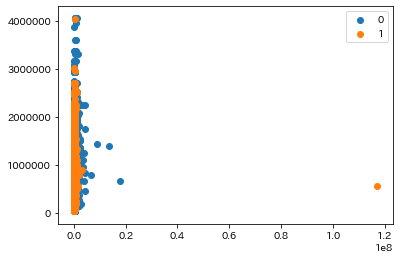

In [99]:
# 年収と借入額をプロットする
plt.scatter(data['AMT_INCOME_TOTAL'][data['TARGET']==0], data['AMT_CREDIT'][data['TARGET']==0], label=0)
plt.scatter(data['AMT_INCOME_TOTAL'][data['TARGET']==1], data['AMT_CREDIT'][data['TARGET']==1], label=1)
plt.legend()
plt.show()

### 収入に外れ値が見られ、しかも返済ができていないので、何らかのミスデータと考えられるので消去する

In [100]:
# 収入の外れ値を消去する
data.drop(data['AMT_INCOME_TOTAL'].idxmax(), inplace=True)

In [101]:
# incomeに対するcreditを表す'credit_income_rate'という列を作る
data['credit_income_rate'] = data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']

In [102]:
# 特徴量として使う列をくっつける
train_x_11 = pd.concat([data[negative_corr_list_5.index], data[positive_corr_list_5.index], data['credit_income_rate']], axis=1)

In [103]:
train_x_11

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,credit_income_rate
0,0.139376,0.262949,0.083037,25.920548,0,1,-1134.0,1,2,2,2.007889
1,NaN,0.622246,0.311267,45.931507,1,0,-828.0,0,1,1,4.790750
2,0.729567,0.555912,NaN,52.180822,0,1,-815.0,1,2,2,2.000000
3,NaN,0.650442,NaN,52.068493,0,0,-617.0,1,2,2,2.316167
4,NaN,0.322738,NaN,54.608219,0,1,-1106.0,1,2,2,4.222222
...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.681632,0.145570,25.553425,0,1,-273.0,1,1,1,1.617143
307507,NaN,0.115992,NaN,56.917808,0,0,0.0,0,2,2,3.743750
307508,0.218859,0.535722,0.744026,41.002740,1,0,-1909.0,1,3,3,4.429176
307509,0.661024,0.514163,NaN,32.769863,0,0,-322.0,0,2,2,2.164368


In [104]:
# 平均値で欠損値を埋める
train_x_11.fillna(train_x_11.mean(), inplace=True)

In [105]:
train_x_11

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,credit_income_rate
0,0.139376,0.262949,0.083037,25.920548,0,1,-1134.0,1,2,2,2.007889
1,0.510858,0.622246,0.311267,45.931507,1,0,-828.0,0,1,1,4.790750
2,0.729567,0.555912,0.502130,52.180822,0,1,-815.0,1,2,2,2.000000
3,0.510858,0.650442,0.502130,52.068493,0,0,-617.0,1,2,2,2.316167
4,0.510858,0.322738,0.502130,54.608219,0,1,-1106.0,1,2,2,4.222222
...,...,...,...,...,...,...,...,...,...,...,...
307506,0.510858,0.681632,0.145570,25.553425,0,1,-273.0,1,1,1,1.617143
307507,0.510858,0.115992,0.502130,56.917808,0,0,0.0,0,2,2,3.743750
307508,0.218859,0.535722,0.744026,41.002740,1,0,-1909.0,1,3,3,4.429176
307509,0.661024,0.514163,0.502130,32.769863,0,0,-322.0,0,2,2,2.164368


In [106]:
train_y_11 = data['TARGET']

In [107]:
tr_x_11, va_x_11, tr_y_11, va_y_11 = train_test_split(train_x_11, train_y_11, test_size=0.25, random_state=0)

In [108]:
lr_11 = LogisticRegression()

In [109]:
lr_predict_proba_score_11 = evaluation_predict_proba(tr_x_11, tr_y_11, va_x_11, va_y_11, lr_11)
print('lr_score:{}'.format(lr_predict_proba_score_11))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.7336960211931269


In [110]:
print(lr_predict_proba_score_5)
print(lr_predict_proba_score_11)

0.7351505630019027
0.7336960211931269


### 収入と借入額の比を新しい特徴量として加えてもsocreは変わらなかった

## 欠損値を-9999で埋める

In [111]:
train_x_missing_value = pd.concat([data[negative_corr_list_5.index], data[positive_corr_list_5.index]], axis=1)

In [112]:
# 欠損値を平均値で埋める
train_x_missing_value.fillna(-9999, inplace=True)

In [113]:
train_x_missing_value

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,age,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.139376,0.262949,0.083037,25.920548,0,1,-1134.0,1,2,2
1,-9999.000000,0.622246,0.311267,45.931507,1,0,-828.0,0,1,1
2,0.729567,0.555912,-9999.000000,52.180822,0,1,-815.0,1,2,2
3,-9999.000000,0.650442,-9999.000000,52.068493,0,0,-617.0,1,2,2
4,-9999.000000,0.322738,-9999.000000,54.608219,0,1,-1106.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
307506,-9999.000000,0.681632,0.145570,25.553425,0,1,-273.0,1,1,1
307507,-9999.000000,0.115992,-9999.000000,56.917808,0,0,0.0,0,2,2
307508,0.218859,0.535722,0.744026,41.002740,1,0,-1909.0,1,3,3
307509,0.661024,0.514163,-9999.000000,32.769863,0,0,-322.0,0,2,2


In [114]:
train_y_missing_value = data['TARGET']

In [115]:
tr_x_5_missing_value, va_x_5_missing_value, tr_y_5_missing_value, va_y_5_missing_value = train_test_split(train_x_missing_value, 
                                                                                                          train_y_missing_value, 
                                                                                                          test_size=0.25, 
                                                                                                          random_state=0)

In [116]:
lr_5_missing_value = LogisticRegression()

In [117]:
lr_predict_proba_score_5_missing_value = evaluation_predict_proba(tr_x_5_missing_value, 
                                                                  tr_y_5_missing_value, 
                                                                  va_x_5_missing_value, 
                                                                  va_y_5_missing_value, 
                                                                  lr_5_missing_value)
print('lr_score:{}'.format(lr_predict_proba_score_5_missing_value))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr_score:0.6040887270106997


In [118]:
print(lr_predict_proba_score_5)
print(lr_predict_proba_score_5_missing_value)

0.7351505630019027
0.6040887270106997


## 欠損値を-9999で埋めると大きくscoreを落としてしまった。

In [119]:
df_score = pd.DataFrame([lr_predict_proba_score, lr_predict_proba_score_5, lr_predict_proba_score_5_ss, 
                         lr_predict_proba_score_11, lr_predict_proba_score_5_missing_value])
df_score.columns = ['roc_auc_score']
df_score.index = ['相関係数上位２０個', '相関係数上位１０個', '相関係数上位１０個、標準化', 
                  '相関係数上位１０個＋収入と借入額の比率', '相関係数上位１０個と欠損値を-9999で埋める']

In [120]:
df_score

,roc_auc_score
相関係数上位２０個,0.599165
相関係数上位１０個,0.735151
相関係数上位１０個、標準化,0.734988
相関係数上位１０個＋収入と借入額の比率,0.733696
相関係数上位１０個と欠損値を-9999で埋める,0.604089


## 相関係数上位１０個を特徴量として使い、標準化せず、欠損値をtrain_dataの平均値で埋めたものが最もscoreがよかった。これからはkaggleのnotetbookを読んで、人のアイデアを盗める技術をつけていきたい。